## ----- Preparation -----

In [2]:
import numpy as np
import pandas as pd

In [3]:
# data from 2004 - 2021 (excluding the year 2020)
Outfield = pd.read_csv('outfield_data.csv')
Outfield = Outfield.loc[Outfield.year != 2020, ]

In [4]:
# excluding columns year, team, games, games started, and completed games
MLOutfield = Outfield.drop(['year', 'Tm', 'G', 'GS', 'CG'], axis = 1)

In [5]:
MLOutfield.head()

,#Fld,RA/G,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood,Playoff
0,11,4.53,4363.0,1161,1110,32,19,6,0.984,-5,-1,-11,6,-17,-4,-26,7,2,1
1,13,5.55,4308.0,984,936,26,22,8,0.978,-26,-7,-22,-4,-1,0,13,-8,-5,0
2,10,4.12,4350.0,1100,1052,40,8,6,0.993,42,12,32,10,37,10,22,11,4,1
3,12,5.12,4366.0,1105,1073,24,8,5,0.993,18,5,17,1,-4,-1,6,-10,0,0
4,10,4.74,4354.0,1034,994,19,21,4,0.980,-23,-6,-17,-6,-28,-7,-19,-7,-1,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
X = MLOutfield.drop('Playoff', axis = 1) # independent
Y = MLOutfield.Playoff # dependent 

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)

In [9]:
test_ml = MLOutfield.Playoff 

#### Preparing current 2022 season:

In [11]:
# 2022 season stats - 8/5/22
Outfield22 = pd.read_csv('mlb22season.csv') 
Outfield22.head()

,Tm,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,A,...,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,Arizona Diamondbacks,7,4.59,104,312,250,2749.0,778,748,20,...,0.987,8,4,11,-3,13,5,11,-1,3
1,Atlanta Braves,12,3.92,106,318,272,2848.0,636,618,9,...,0.986,-15,-6,-11,-4,-8,-3,-2,-3,-3
2,Baltimore Orioles,11,4.18,105,315,272,2789.0,708,677,23,...,0.989,-6,-3,-10,4,13,5,4,9,0
3,Boston Red Sox,9,4.68,107,321,269,2860.0,672,658,9,...,0.993,14,6,12,2,-4,-1,-2,0,-2
4,Chicago Cubs,11,4.95,104,312,252,2782.0,672,638,20,...,0.979,-19,-8,-22,3,-20,-8,-21,2,-1


In [12]:
Outfield22index = [col not in ['Tm', 'G', '#Fld', 'RA/G', 'CG', 'Fld%', 'Rdrs/yr', 'Rtot/yr'] for col in Outfield22.columns]
for col in Outfield22.columns[Outfield22index]:
    Outfield22[col] = Outfield22[col] * (162 / Outfield22.G) 

In [13]:
MLOutfield22 = Outfield22.drop(['Tm', 'G', 'GS', 'CG'], axis = 1) 
# same columns dropped as above except there's no year to begin with in this one
MLOutfield22.head()

,#Fld,RA/G,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,7,4.59,4282.096154,1211.884615,1165.153846,31.153846,15.576923,7.788462,0.987,12.461538,4,17.134615,-4.673077,20.250000,5,17.134615,-1.557692,4.673077
1,12,3.92,4352.603774,972.000000,944.490566,13.754717,13.754717,3.056604,0.986,-22.924528,-6,-16.811321,-6.113208,-12.226415,-3,-3.056604,-4.584906,-4.584906
2,11,4.18,4303.028571,1092.342857,1044.514286,35.485714,12.342857,4.628571,0.989,-9.257143,-3,-15.428571,6.171429,20.057143,5,6.171429,13.885714,0.000000
3,9,4.68,4330.093458,1017.420561,996.224299,13.626168,7.570093,3.028037,0.993,21.196262,6,18.168224,3.028037,-6.056075,-1,-3.028037,0.000000,-3.028037
4,11,4.95,4333.500000,1046.769231,993.807692,31.153846,21.807692,4.673077,0.979,-29.596154,-8,-34.269231,4.673077,-31.153846,-8,-32.711538,3.115385,-1.557692


In [14]:
MLOutfield22.shape # 30 teams, and playoff is the missing column

(30, 18)

## ----- (1) Logistic Regression model -----

Logistic regression is used to predict binary outcomes, and in this case would be "Yes" or "No" for if a team made it to the playoffs or not.

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg_model = LogisticRegression(max_iter = 10000)
logreg_model.fit(Xtrain, Ytrain)
predicted = logreg_model.predict(Xtest)
actual = Ytest

In [17]:
print(metrics.accuracy_score(predicted, actual)) # (1) accuracy score

0.765625


In [18]:
from collections import Counter

In [19]:
all_playoff_teams = Counter()
for iteration in range(50):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    logreg_model = LogisticRegression(max_iter = 10000)
    logreg_model.fit(Xtrain, Ytrain)
    predictions_2022 = logreg_model.predict(MLOutfield22)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':Outfield22.Tm, 'Playoff Prediction':predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    all_playoff_teams.update(list(playoff_teams_2022))

In [124]:
pd.DataFrame({'Team':all_playoff_teams.keys(), 
              'Frequency':all_playoff_teams.values()}
            ).sort_values(by = 'Frequency', ascending = False)

,Team,Frequency
0,Atlanta Braves,50
1,Boston Red Sox,50
2,Los Angeles Angels,50
3,New York Mets,50
4,New York Yankees,50
5,Philadelphia Phillies,50
6,Pittsburgh Pirates,50
7,Seattle Mariners,50
8,Texas Rangers,50
9,Toronto Blue Jays,50


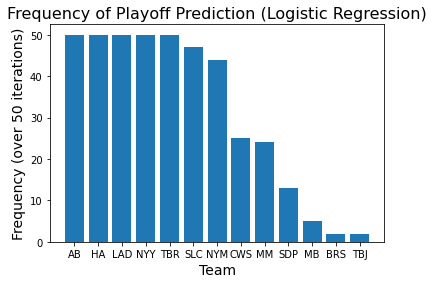

In [125]:
import matplotlib.pyplot as plt
   
Team = ['AB','HA','LAD','NYY','TBR', 'SLC', 'NYM', 'CWS', 'MM', 'SDP', 'MB', 'BRS', 'TBJ']
Frequency = [50,50,50,50,50,47,44,25,24,13,5,2,2]

plt.bar(Team, Frequency)
plt.title('Frequency of Playoff Prediction (Logistic Regression)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Frequency (over 50 iterations)', fontsize=14)
plt.show()

## ----- (2) Decision Tree -----

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(Xtrain, Ytrain)
Ypred = dtc.predict(Xtest)

In [23]:
predicted = dtc.predict(Xtest)
actual = Ytest
print(metrics.accuracy_score(predicted, actual))

0.625


In [24]:
season22pred = dtc.predict(MLOutfield22)
Playoff_Predictions = pd.DataFrame({'2022 Teams':Outfield22.Tm, 'Playoff Prediction':season22pred})

In [127]:
outfield_dectree = Counter()
for iteration in range(100):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    dtc = DecisionTreeClassifier()
    dtc.fit(Xtrain, Ytrain)
    predictions_2022 = dtc.predict(MLOutfield22)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':Outfield22.Tm, 'Playoff Prediction':predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    outfield_dectree.update(list(playoff_teams_2022))

In [128]:
outfield_dectree = pd.DataFrame({'Team':outfield_dectree.keys(), 
              'Frequency':outfield_dectree.values()}
            ).sort_values(by = 'Frequency', ascending = False)
outfield_dectree

,Team,Frequency
8,New York Yankees,92
7,New York Mets,90
12,Tampa Bay Rays,80
18,Toronto Blue Jays,72
2,Chicago White Sox,65
13,Texas Rangers,60
1,Boston Red Sox,54
15,Houston Astros,53
17,Seattle Mariners,51
19,Atlanta Braves,46


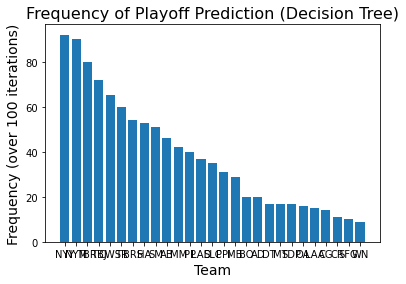

In [144]:
Team = ['NYY', 'NYM', 'TBR', 'TBJ', 'CWS', 'TR', 'BRS', 'HA', 'SM', 'AB', 'MM', 'PP', 'LAD', 'SLC', 'PPi', 'MB', 'BO', 'AD', 'DT', 'MT', 'SDP', 'OA', 'LAA', 'CG', 'CR', 'SFG', 'WN']
FrequencyTree = outfield_dectree.Frequency
plt.bar(Team, FrequencyTree)
plt.title('Frequency of Playoff Prediction (Decision Tree)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Frequency (over 100 iterations)', fontsize=14)
plt.show()

## ----- (3) K Nearest Neighbor -----

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import clear_output

In [77]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier()

In [78]:
predicted = knn.predict(Xtest)
actual = Ytest
print(metrics.accuracy_score(predicted, actual))

0.71875


In [96]:
outfield_kneighbor = Counter()
for iteration in range(50):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    knn = KNeighborsClassifier()
    knn.fit(Xtrain, Ytrain)
    predictions_2022 = dtc.predict(MLOutfield22)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':Outfield22.Tm, 'Playoff Prediction':predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    outfield_kneighbor.update(list(playoff_teams_2022))

In [99]:
outfield_kneighbor

Counter({'Atlanta Braves': 50,
         'Boston Red Sox': 50,
         'Chicago White Sox': 50,
         'Cleveland Guardians': 50,
         'Detroit Tigers': 50,
         'Houston Astros': 50,
         'Los Angeles Dodgers': 50,
         'Milwaukee Brewers': 50,
         'Minnesota Twins': 50,
         'New York Mets': 50,
         'New York Yankees': 50,
         'Philadelphia Phillies': 50,
         'San Diego Padres': 50,
         'Seattle Mariners': 50,
         'St. Louis Cardinals': 50,
         'Tampa Bay Rays': 50,
         'Texas Rangers': 50,
         'Toronto Blue Jays': 50})